# Outline

# Import libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, make_scorer
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve, plot_roc_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier

from lightgbm import LGBMRegressor

import os

In [2]:
# Unzip archive
!Unzip -o archive.zip

Archive:  archive.zip
  inflating: race_wise_data/1983/round_1.csv  
  inflating: race_wise_data/1983/round_10.csv  
  inflating: race_wise_data/1983/round_11.csv  
  inflating: race_wise_data/1983/round_12.csv  
  inflating: race_wise_data/1983/round_13.csv  
  inflating: race_wise_data/1983/round_14.csv  
  inflating: race_wise_data/1983/round_15.csv  
  inflating: race_wise_data/1983/round_2.csv  
  inflating: race_wise_data/1983/round_3.csv  
  inflating: race_wise_data/1983/round_4.csv  
  inflating: race_wise_data/1983/round_5.csv  
  inflating: race_wise_data/1983/round_6.csv  
  inflating: race_wise_data/1983/round_7.csv  
  inflating: race_wise_data/1983/round_8.csv  
  inflating: race_wise_data/1983/round_9.csv  
  inflating: race_wise_data/1984/round_1.csv  
  inflating: race_wise_data/1984/round_10.csv  
  inflating: race_wise_data/1984/round_11.csv  
  inflating: race_wise_data/1984/round_12.csv  
  inflating: race_wise_data/1984/round_13.csv  
  inflating: race_wise_data/

In [3]:
# Create empty DataFrame availbe for accpet values
F1_data = pd.DataFrame()
F1_data_year = pd.DataFrame()

In [4]:
# Utility Function
def get_DataFrame_F1(dirname):
    global F1_data
    global F1_data_year
    foldernames = os.listdir(dirname)
    for folder in foldernames:
        foldername = os.path.join(dirname, folder)
        for file in foldername:
            filenames = os.listdir(foldername)
            for file in filenames:
                filename = os.path.join(foldername, file)
                F1_data_temp = pd.read_csv(filename)
                F1_data_year = pd.concat([F1_data_year, F1_data_temp])
    F1_data = pd.concat([F1_data, F1_data_year])
    return F1_data

In [5]:
# Define dirname and create full DataFrame for EDA
dirname = 'race_wise_data'
get_DataFrame_F1(dirname)

,season,round,circuit_id,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,driver,nationality,...,grid,podium,driver_points,driver_wins,driver_standings_pos,constructor_points,constructor_wins,constructor_standings_pos,qualifying_time,driver_age
0,2013,18,americas,False,False,False,False,False,vettel,German,...,1,1,347,11,1,513,11,1,0.000,26
1,2013,18,americas,False,False,False,False,False,webber,Australian,...,2,3,166,0,5,513,11,1,0.103,37
2,2013,18,americas,False,False,False,False,False,grosjean,French,...,3,2,114,0,7,297,1,4,0.817,27
3,2013,18,americas,False,False,False,False,False,hulkenberg,German,...,4,6,39,0,11,45,0,7,0.958,26
4,2013,18,americas,False,False,False,False,False,hamilton,British,...,5,4,175,1,4,334,3,2,1.007,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,2004,10,magny_cours,True,False,False,False,False,massa,Brazilian,...,16,13,5,0,12,15,0,6,2.502,23
16,2004,10,magny_cours,True,False,False,False,False,heidfeld,German,...,17,16,3,0,15,5,0,8,3.109,27
17,2004,10,magny_cours,True,False,False,False,False,pantano,Italian,...,18,17,0,0,20,5,0,8,3.764,25
18,2004,10,magny_cours,True,False,False,False,False,bruni,Italian,...,19,18,0,0,21,1,0,10,4.215,23


## Dataset Overview

# Data Preprocessing

In [6]:
# Check features 'F1_data' contains
print('Features: ', F1_data.columns)
F1_data.head()

Features:  Index(['season', 'round', 'circuit_id', 'weather_warm', 'weather_cold',
       'weather_dry', 'weather_wet', 'weather_cloudy', 'driver', 'nationality',
       'constructor', 'grid', 'podium', 'driver_points', 'driver_wins',
       'driver_standings_pos', 'constructor_points', 'constructor_wins',
       'constructor_standings_pos', 'qualifying_time', 'driver_age'],
      dtype='object')


,season,round,circuit_id,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,driver,nationality,...,grid,podium,driver_points,driver_wins,driver_standings_pos,constructor_points,constructor_wins,constructor_standings_pos,qualifying_time,driver_age
0,2013,18,americas,False,False,False,False,False,vettel,German,...,1,1,347,11,1,513,11,1,0.000,26
1,2013,18,americas,False,False,False,False,False,webber,Australian,...,2,3,166,0,5,513,11,1,0.103,37
2,2013,18,americas,False,False,False,False,False,grosjean,French,...,3,2,114,0,7,297,1,4,0.817,27
3,2013,18,americas,False,False,False,False,False,hulkenberg,German,...,4,6,39,0,11,45,0,7,0.958,26
4,2013,18,americas,False,False,False,False,False,hamilton,British,...,5,4,175,1,4,334,3,2,1.007,28


In [7]:
# Check whether 'crimes' contains any Null or NaN values
F1_data.isnull().sum()

season                       0
round                        0
circuit_id                   0
weather_warm                 0
weather_cold                 0
weather_dry                  0
weather_wet                  0
weather_cloudy               0
driver                       0
nationality                  0
constructor                  0
grid                         0
podium                       0
driver_points                0
driver_wins                  0
driver_standings_pos         0
constructor_points           0
constructor_wins             0
constructor_standings_pos    0
qualifying_time              0
driver_age                   0
dtype: int64

In [8]:
# Additional arranging 'F1_data'
F1_data.sort_values(by=['season', 'round'], ascending=True, inplace=True)
F1_data.reset_index(drop=True, inplace=True)
F1_data

,season,round,circuit_id,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,driver,nationality,...,grid,podium,driver_points,driver_wins,driver_standings_pos,constructor_points,constructor_wins,constructor_standings_pos,qualifying_time,driver_age
0,1983,1,jacarepagua,False,False,True,False,False,keke_rosberg,Finnish,...,1,15,0,0,0,0,0,0,0.000,34
1,1983,1,jacarepagua,False,False,True,False,False,prost,French,...,2,6,0,0,0,0,0,0,0.146,28
2,1983,1,jacarepagua,False,False,True,False,False,tambay,French,...,3,4,0,0,0,0,0,0,0.232,33
3,1983,1,jacarepagua,False,False,True,False,False,piquet,Brazilian,...,4,1,0,0,0,0,0,0,0.588,30
4,1983,1,jacarepagua,False,False,True,False,False,warwick,British,...,5,7,0,0,0,0,0,0,0.680,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271163,2019,21,yas_marina,True,False,False,False,False,giovinazzi,Italian,...,16,16,14,0,17,57,0,8,3.335,25
271164,2019,21,yas_marina,True,False,False,False,False,raikkonen,Finnish,...,17,13,43,0,12,57,0,8,3.604,40
271165,2019,21,yas_marina,True,False,False,False,False,russell,British,...,18,17,0,0,20,1,0,10,3.938,21
271166,2019,21,yas_marina,True,False,False,False,False,kubica,Polish,...,19,19,1,0,19,1,0,10,4.457,34


In [9]:
# Create another DataFrame for training
F1_data_train = F1_data.copy()
F1_data_train.drop(['season', 'round', 'circuit_id', 'driver', 'nationality', 'constructor'], axis=1, inplace=True)

weathers = ['weather_warm', 'weather_cold', 'weather_dry', 'weather_wet', 'weather_cloudy']
for weather in weathers:
    F1_data_train[weather] = F1_data_train[weather].apply(lambda x : 1 if x == True else 0)

F1_data_train

,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,grid,podium,driver_points,driver_wins,driver_standings_pos,constructor_points,constructor_wins,constructor_standings_pos,qualifying_time,driver_age
0,0,0,1,0,0,1,15,0,0,0,0,0,0,0.000,34
1,0,0,1,0,0,2,6,0,0,0,0,0,0,0.146,28
2,0,0,1,0,0,3,4,0,0,0,0,0,0,0.232,33
3,0,0,1,0,0,4,1,0,0,0,0,0,0,0.588,30
4,0,0,1,0,0,5,7,0,0,0,0,0,0,0.680,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271163,1,0,0,0,0,16,16,14,0,17,57,0,8,3.335,25
271164,1,0,0,0,0,17,13,43,0,12,57,0,8,3.604,40
271165,1,0,0,0,0,18,17,0,0,20,1,0,10,3.938,21
271166,1,0,0,0,0,19,19,1,0,19,1,0,10,4.457,34


## Summary
The dataset has already been preprocessed, so there're nothing left to do.  
But, it contains 21 features which are relatively more than any other datasets.


# Decomposition

<AxesSubplot:title={'center':'Corrleation Heatmap of F1_data'}>

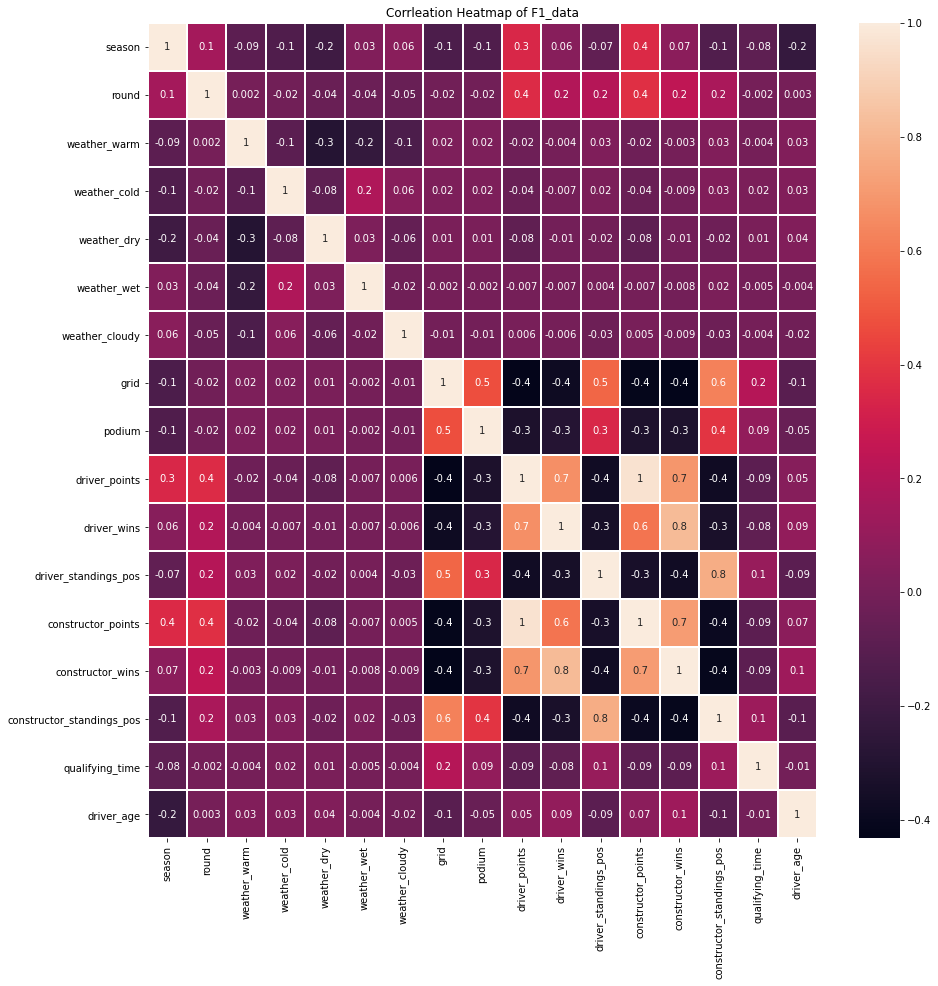

In [10]:
# Check corrleation of 'F1_data'
plt.figure(figsize=(15, 15))
plt.title('Corrleation Heatmap of F1_data')
sns.heatmap(F1_data.corr(), annot=True, fmt='.1g', linewidths=.3)

## Description
As you can see heatmap above, featrues from 'grid' to 'constructor_standing_pos' are heavily related with dataset.  
Therefore, using PCA, we are gonna process decomposition

In [11]:
features_dec = ['grid', 'podium', 'driver_points', 'driver_standings_pos', 'constructor_points', 'constructor_wins', 'constructor_standings_pos']
F1_data_scaled = F1_data.copy()

scaler = StandardScaler()
F1_data_scaled = scaler.fit_transform(F1_data[features_dec])
pca = PCA(n_components=2)
pca.fit(F1_data_scaled)
print('Variability by PCA Components: ', pca.explained_variance_ratio_)

Variability by PCA Components:  [0.55476904 0.18683496]


## Description
We can explain explain the variance of 7 features with 2 PCA components  
The total variance is about 73% and the first axis was the highest with 55%

In [12]:
# Set X, y as features and label
F1_data_scaled = F1_data_train.copy()

X_features = F1_data_scaled.drop('driver_wins', axis=1, inplace=False)
y_label = F1_data_scaled['driver_wins']
print('Shape of X_features: {0} / Shape of y_label: {1}'.format(X_features.shape, y_label.shape))

Shape of X_features: (271168, 14) / Shape of y_label: (271168,)


In [13]:
# Evaluate accuracy score without PCA
rf_clf = RandomForestClassifier(n_estimators=300, random_state=11)
scores = cross_val_score(rf_clf, X_features, y_label, scoring='accuracy', cv=3)

print('Accuracy by each fold: ', scores)
print('Average Accuracy: {0:.4f}'.format(np.mean(scores)))

Accuracy by each fold:  [0.90099569 0.89889256 0.86967441]
Average Accuracy: 0.8899


In [14]:
# Evaluate accuracy score with PCA
pca = PCA(n_components=7)
df_pca = pca.fit_transform(X_features)
scores_pca = cross_val_score(rf_clf, df_pca, y_label, scoring='accuracy', cv=3)

print('Accuracy by each fold PCA converted: ', scores_pca)
print('Average Accuracy PCA converted: {0:.4f}'.format(np.mean(scores_pca)))

Accuracy by each fold PCA converted:  [0.86841465 0.86820299 0.76646495]
Average Accuracy PCA converted: 0.8344


## Summary
The number of columns was decreased from 14 to 7, so the decreased rate is 50%  
But, the accuracy score was decreased from 88.99% to 83.44%, which means 6% decreased  

# Visualization

## Distribution of Weather

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

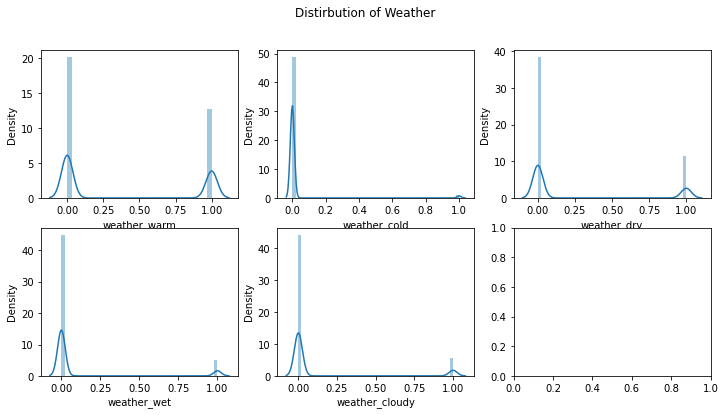

In [15]:
# Extract data for plotting distribution
F1_data_weather = F1_data.iloc[:, [3, 4, 5, 6, 7]]

# Check distribution of each features
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

for i, feature in enumerate(F1_data_weather.columns):
    row = int(i/3)
    col = i%3
    sns.distplot(F1_data_weather.iloc[:, i], ax=axs[row][col])

plt.suptitle('Distirbution of Weather')
plt.tight_layout

## Description
That plot shows the distribution of weather.  
Generally, it was warm and moderate

## Distribution of Nationality

In [16]:
# Create DataFrame for Pie Chart
F1_data_nation = pd.DataFrame(data=F1_data['nationality'].value_counts())
F1_data_nation.reset_index(inplace=True)
F1_data_nation.rename({'index' : 'nationality', 'nationality' : 'count'}, axis=1, inplace=True)
F1_data_nation.sort_values(by='count', ascending=False, inplace=True)
F1_data_nation

,nationality,count
0,Italian,40128
1,British,39729
2,German,33250
3,French,28975
4,Brazilian,27588
5,Finnish,18031
6,Spanish,12103
7,Japanese,10241
8,Austrian,8189
9,Australian,7942


In [17]:
# Encode features
le = LabelEncoder()

le.fit(F1_data_nation['nationality'])
F1_data_nation['nationality_le'] = le.transform(F1_data_nation['nationality'])
F1_data_nation

,nationality,count,nationality_le
0,Italian,40128,20
1,British,39729,6
2,German,33250,15
3,French,28975,14
4,Brazilian,27588,5
5,Finnish,18031,13
6,Spanish,12103,29
7,Japanese,10241,21
8,Austrian,8189,3
9,Australian,7942,2


Text(0.5, 1.0, 'Distribution of Nationality')

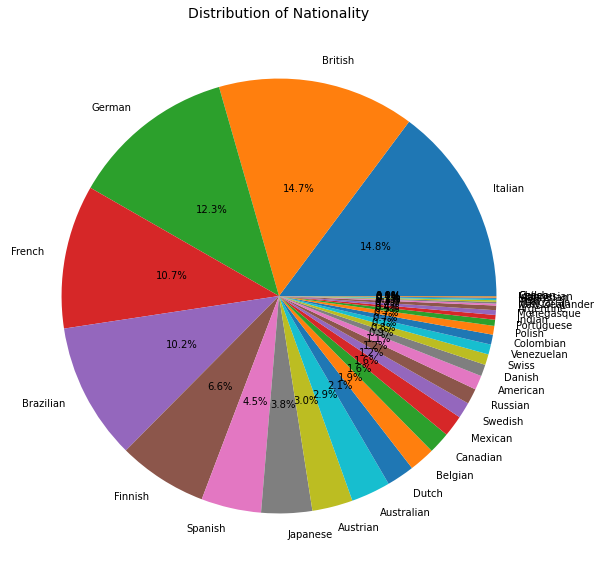

In [18]:
# Pie Chart
pie, ax = plt.subplots(figsize=[10, 10])
labels = F1_data_nation['nationality']
plt.pie(F1_data_nation['count'], autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Distribution of Nationality", fontsize=14)

Text(0.5, 1.0, 'Distribution of Nationality [Top 10]')

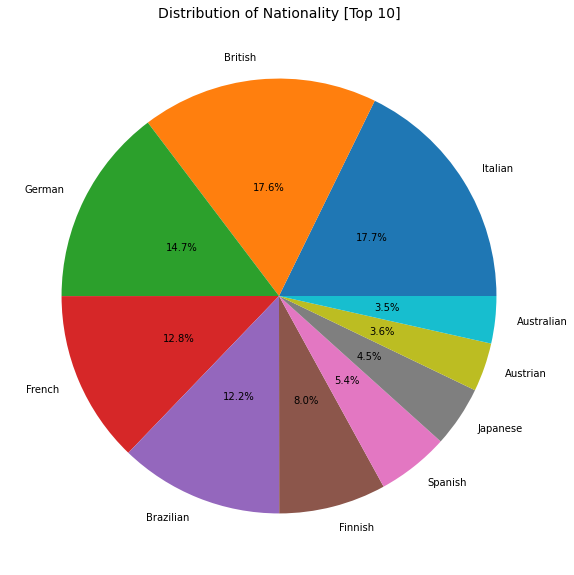

In [19]:
# Pie Chart
pie, ax = plt.subplots(figsize=[10, 10])
labels = F1_data_nation.iloc[0:10, 0]
plt.pie(F1_data_nation.iloc[0:10, 1], autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Distribution of Nationality [Top 10]", fontsize=14)

## Description
Usually, countries in Europe were superior to other countries.

## Distribution of Age

<AxesSubplot:title={'center':'Distribution of Age'}, xlabel='driver_age', ylabel='Density'>

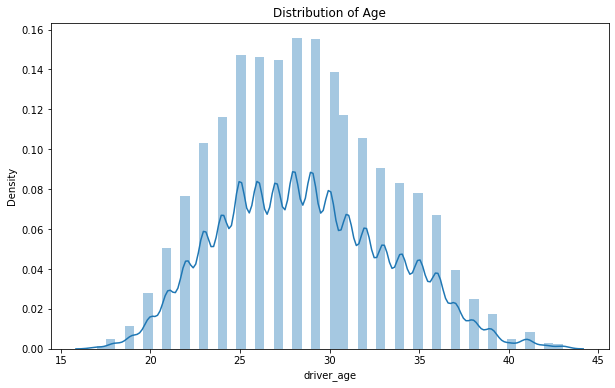

In [20]:
# Plot density plot
plt.figure(figsize=(10, 6))
plt.title('Distribution of Age')
sns.distplot(F1_data['driver_age'])

## Description
The distribution of age of drivers were much similiar as Normal Distribution which is compatible for training.

# Create Datasets

In [21]:
# Scaling
for feature in F1_data_train.columns:
    scaler = StandardScaler()
    scaler = scaler.fit(np.array(F1_data_train[feature]).reshape(-1, 1))
    F1_data_train[feature] = scaler.transform(np.array(F1_data_train[feature]).reshape(-1, 1))

F1_data_train

,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,grid,podium,driver_points,driver_wins,driver_standings_pos,constructor_points,constructor_wins,constructor_standings_pos,qualifying_time,driver_age
0,-0.793823,-0.151688,1.834992,-0.332268,-0.360194,-1.607360,0.448911,-0.466191,-0.310682,-1.387462,-0.482641,-0.379075,-1.527030,-0.318197,1.143873
1,-0.793823,-0.151688,1.834992,-0.332268,-0.360194,-1.458705,-0.875884,-0.466191,-0.310682,-1.387462,-0.482641,-0.379075,-1.527030,-0.300233,-0.135410
2,-0.793823,-0.151688,1.834992,-0.332268,-0.360194,-1.310050,-1.170282,-0.466191,-0.310682,-1.387462,-0.482641,-0.379075,-1.527030,-0.289651,0.930659
3,-0.793823,-0.151688,1.834992,-0.332268,-0.360194,-1.161396,-1.611880,-0.466191,-0.310682,-1.387462,-0.482641,-0.379075,-1.527030,-0.245847,0.291018
4,-0.793823,-0.151688,1.834992,-0.332268,-0.360194,-1.012741,-0.728684,-0.466191,-0.310682,-1.387462,-0.482641,-0.379075,-1.527030,-0.234527,-0.135410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271163,1.259727,-0.151688,-0.544961,-0.332268,-0.360194,0.622460,0.596110,-0.130354,-0.310682,0.817298,0.222799,-0.379075,0.548370,0.092157,-0.775051
271164,1.259727,-0.151688,-0.544961,-0.332268,-0.360194,0.771115,0.154512,0.565308,-0.310682,0.168839,0.222799,-0.379075,0.548370,0.125256,2.423155
271165,1.259727,-0.151688,-0.544961,-0.332268,-0.360194,0.919769,0.743309,-0.466191,-0.310682,1.206374,-0.470265,-0.379075,1.067220,0.166353,-1.627906
271166,1.259727,-0.151688,-0.544961,-0.332268,-0.360194,1.068424,1.037708,-0.442203,-0.310682,1.076682,-0.470265,-0.379075,1.067220,0.230213,1.143873


In [22]:
# Set X, y for features and label
X = F1_data_train.drop('driver_wins', axis=1, inplace=False)
y = F1_data_train['driver_wins'].astype(int)

In [23]:
# Split datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (216934, 14)
Shape of X_test:  (54234, 14)
Shape of y_train:  (216934,)
Shape of y_test:  (54234,)


# Classification

In [24]:
# Utility Function
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='macro')
    recall = recall_score(y_test, pred, average='macro')
    f1 = f1_score(y_test, pred, average='macro')
    roc_auc = roc_auc_score(y_test, pred_proba, multi_class='ovr', average='macro')
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

## Logistic Regression

In [25]:
# Create Estimator CLass
lr_clf = LogisticRegression()

# Fitting
lr_clf.fit(X_train, y_train)

# Prediction
lr_pred = lr_clf.predict(X_test)

# Pred_Proba
lr_pred_proba = lr_clf.predict_proba(X_test)

# Evaluation
get_clf_eval(y_test, lr_pred, lr_pred_proba)

Confusion Matrix
[[49348   372    34    30     0     5     0     0     0     0     0]
 [ 1023   505   101    61     8    10     0     0     0     0     0]
 [  137   349   277   192    10     4     0     0     0     0     0]
 [    0    41   175   749    33    14     0     4     1     2     0]
 [    0     0     0   201    93     4     6     3     0     0     0]
 [    0     0     0    73    27    44    10     0     5     0     0]
 [    0     0     0    15     6    40    41    13     0     0     0]
 [    0     0     0     3     0     7    12    37    22     5     0]
 [    0     0     0     0     0     2     6    18    23     0     0]
 [    0     0     0     0     0     4     3     0    15     6     0]
 [    0     0     0     0     0     0     0     0     0     0     5]]
Accuracy: 0.9427, Precision: 0.5542, Recall 0.4871, F1: 0.5073, AUC:0.9919


## Comment
In fact, estimators such as LogisticRegression or DecisionTreeClassifier is very fundamental but powerful on binary class problems.  
Although I choosed for LogisticRegreesion, its accuracy and AUC are 94.27% and 99.19% each.  
LogisticRegression is known as good estimator to use not only binary problems but also mutliclass problems.  

But, in this dataset, there are no binary features.  
Therefore, it might be good idea to binarize features with threshold values in custom.  
I will try for an update soon.

Thanks for reviewing my Notebook!